<a href="https://colab.research.google.com/github/Neethuharii/Linear-Algebra/blob/main/Linear%20Algebra%201/ML_foundation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Matrix Operation

##Eigendecomposition

####Affine transformation via Matrix Application

In [2]:
import numpy as np


In [3]:
v= np.array([3,1])
v

array([3, 1])

In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_vectors(vectors, colors):
   plt.figure()
   plt.axvline(x=0, color='lightgray')
   plt.axhline(y=0, color='lightgray')

   for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

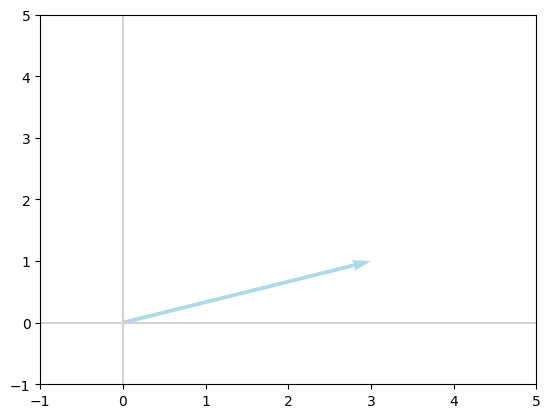

In [6]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [7]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [8]:
Iv=np.dot(v,I)
Iv

array([3, 1])

In [9]:
v==Iv

array([ True,  True])

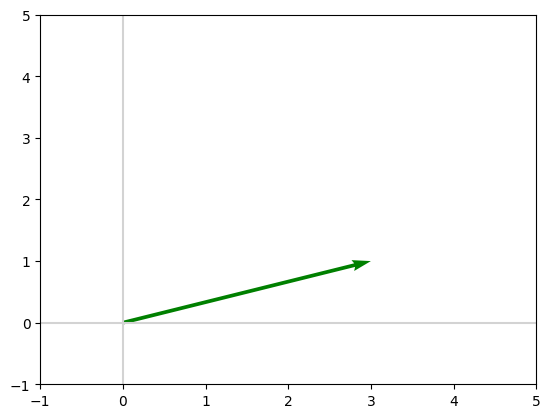

In [10]:
plot_vectors([Iv],['green'])
plt.xlim(-1,5)
_=plt.ylim(-1,5)

In [11]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [12]:
Ev=np.dot(v,E)
Ev

array([ 3, -1])

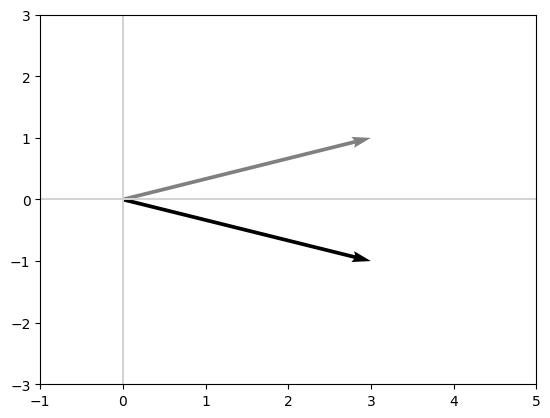

In [13]:
plot_vectors([v,Ev],['grey','black'])
plt.xlim(-1,5)
_=plt.ylim(-3,3)


In [14]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [15]:
Fv=np.dot(v,F)
Fv


array([-3,  1])

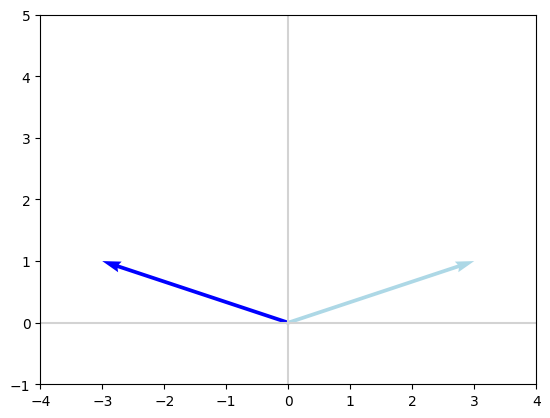

In [16]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

In [17]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [18]:
Av=np.dot(A,v)
Av

array([1, 4])

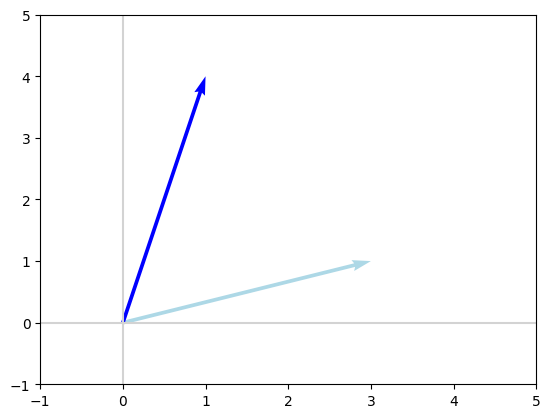

In [19]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

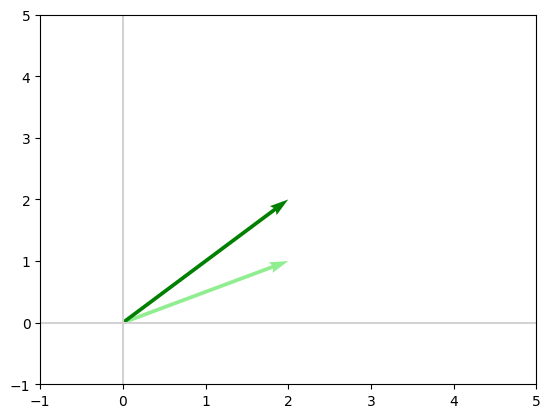

In [20]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [21]:
v

array([3, 1])

recall that we need to convert array to 2D to transpose into column

In [22]:
np.matrix(v).T

matrix([[3],
        [1]])

In [23]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [24]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T
                    ),axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [25]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [26]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [27]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [28]:
vectorfy(V, 0)

array([3, 1])

In [29]:
vectorfy(IV, 1)

array([2, 1])

In [30]:
vectorfy(V, 0)==v

array([ True,  True])

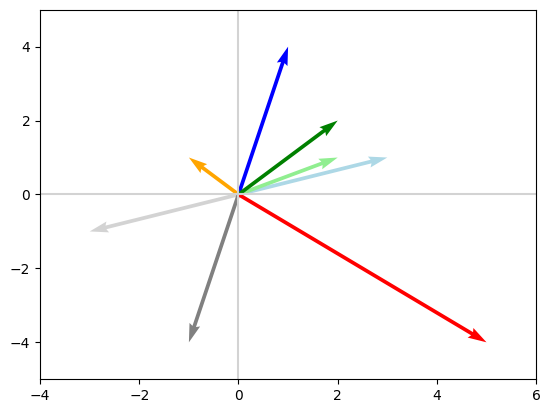

In [31]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

###Eigen vector and Eigen Value

Av = lambda v

In [32]:
A

array([[-1,  4],
       [ 2, -2]])

In [33]:
lambdas, V=np.linalg.eig(A)
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [34]:
lambdas

array([ 1.37228132, -4.37228132])

In [35]:
v=V[:,0]
v

array([0.86011126, 0.51010647])

In [36]:
lambdahu=lambdas[0]
lambdahu

1.3722813232690143

In [37]:
d=np.dot(A,v)
d

array([1.18031462, 0.70000958])

In [38]:
lambdahu *v

array([1.18031462, 0.70000958])

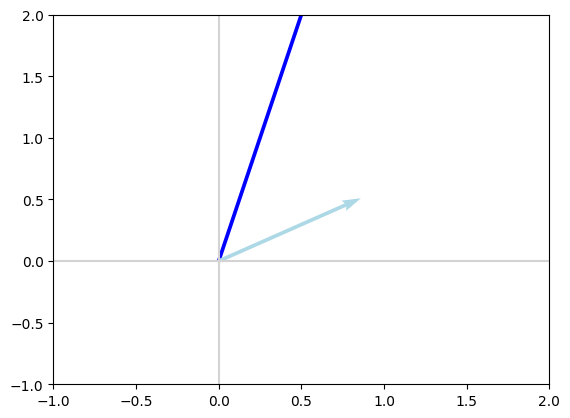

In [39]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

Using pytorch

In [40]:
import numpy as np
import torch

In [41]:
A

array([[-1,  4],
       [ 2, -2]])

In [42]:
A_pt=torch.tensor([[-1,4],[2,-2.]])
A_pt

tensor([[-1.,  4.],
        [ 2., -2.]])

In [43]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_pt)

In [44]:
V_cplx

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [45]:
V_p = V_cplx.float()
V_p

<ipython-input-45-1ff842aa4f17>:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:299.)
  V_p = V_cplx.float()


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [46]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [47]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [48]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [49]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [50]:
Av_p = torch.matmul(A_pt, v_p) # matmul() expects float-typed tensors
Av_p


tensor([1.1803, 0.7000])

In [51]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [52]:
v2_p = V_p[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [53]:
lambda2_p = lambdas_p[1]
lambda2_p

tensor(-4.3723)

In [54]:
Av2_p = torch.matmul(A_pt.float(), v2_p.float())
Av2_p

tensor([ 3.3428, -2.8182])

In [55]:
lambda2_p.float() * v2_p.float()

tensor([ 3.3428, -2.8182])

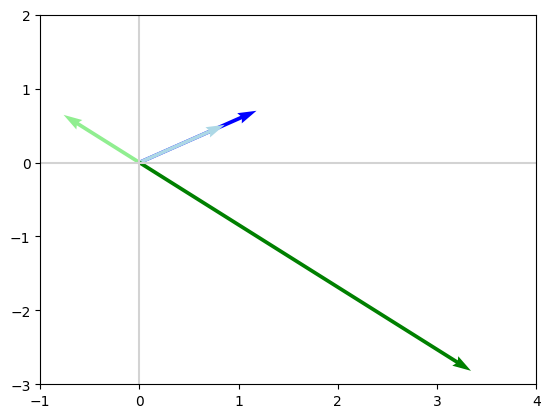

In [56]:
plot_vectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()],
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

#### 2x2 Matrix Determinant

In [57]:
x=np.array([[4,2],[-5,-3]])
x

array([[ 4,  2],
       [-5, -3]])

In [58]:
det = np.linalg.det(x)
det

-2.0000000000000013

####Generalization of determinant

In [59]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [60]:
np.linalg.det(X)

19.999999999999996

####Determinant and eigenvalues

In [61]:
lambdas,V=np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [62]:
np.product(lambdas)

19.99999999999999

In [63]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

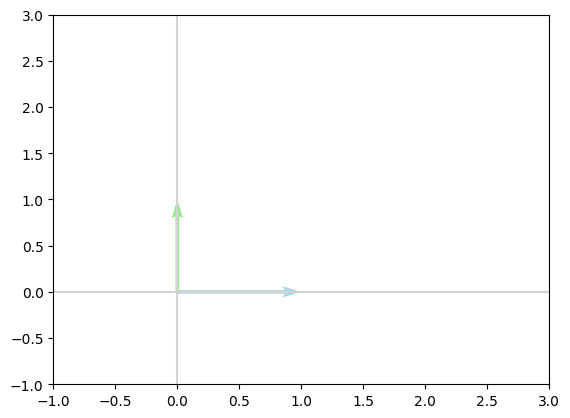

In [64]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

####Eigen decomposition

A = V /\ V^-1

In [66]:
A = np.array([[4, 2], [-5, -3]])
A

array([[ 4,  2],
       [-5, -3]])

In [68]:
lambdas,V=np.linalg.eig(A)
lambdas

array([ 2., -1.])

In [69]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [70]:
Vinv =np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [72]:
Lambda=np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

In [73]:
np.dot(V,np.dot(Lambda,Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

A=Q /\ Q^T

In [74]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [75]:
lambdas,Q =np.linalg.eig(A)

In [76]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [77]:
Lambda=np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [78]:
Q_trans=Q.T
Q_trans

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [79]:
np.dot(Q,np.dot(Lambda,Q_trans))

array([[2., 1.],
       [1., 2.]])

####Exercise


P=V /\ V^-1

In [80]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [86]:
lambdas,V= torch.linalg.eig(P)

In [87]:
V

tensor([[ 0.9511+0.j, -0.2386+0.j,  0.1626+0.j],
        [ 0.1218+0.j, -0.1924+0.j, -0.7705+0.j],
        [ 0.2837+0.j, -0.9519+0.j,  0.6163+0.j]])

In [88]:
Lambda = torch.diag(lambdas)
Lambda

tensor([[23.7644+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  6.6684+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -3.4328+0.j]])

In [89]:
Vinv=torch.linalg.inv(V)
Vinv

tensor([[ 1.1356+0.j,  0.0102+0.j, -0.2868+0.j],
        [ 0.3914+0.j, -0.7198-0.j, -1.0032-0.j],
        [ 0.0817+0.j, -1.1164-0.j,  0.2052+0.j]])

In [90]:
torch.matmul(V,torch.matmul(Lambda,Vinv))

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 3.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [ 5.0000+0.j,  7.0000+0.j,  4.0000+0.j]])

S= Q/\Q^T

In [91]:
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [92]:
lambdas,Q = torch.linalg.eig(S)

In [93]:
Q

tensor([[ 0.9744+0.j,  0.1943+0.j, -0.1132+0.j],
        [ 0.0614+0.j,  0.2548+0.j,  0.9651+0.j],
        [-0.2163+0.j,  0.9473+0.j, -0.2363+0.j]])

In [94]:
Lambda=torch.diag(lambdas)
Lambda

tensor([[26.2361+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  3.2435+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -2.4796+0.j]])

In [95]:
Q_trans = Q.T
Q_trans

tensor([[ 0.9744+0.j,  0.0614+0.j, -0.2163+0.j],
        [ 0.1943+0.j,  0.2548+0.j,  0.9473+0.j],
        [-0.1132+0.j,  0.9651+0.j, -0.2363+0.j]])

In [96]:
torch.matmul(Q,torch.matmul(Lambda,Q_trans))

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 2.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [-5.0000+0.j,  1.0000+0.j,  4.0000+0.j]])